In [149]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from scipy.optimize import curve_fit
import scipy.stats as sts

## Задача 1.  Нелинейная регрессия (2 балла).

Создайте датасет следующим образом: выберите $n=7$ точек $x_i$ из равномерного распределения на отрезке $[0,6]$. Затем вычислите $y_i=f\left(x_i\right)+\epsilon_i$, где $f(x)=10 \sin (x)$, а $\epsilon_i-$ независимые стандартные нормальные случайные величины. Изобразите на одном графике точки датасета и функцию $f$.

Аппроксимируйте датасет с помощью линейной $l(x)=w_0+w_1 x$ и кубической $c(x)=$ $w_0+w_1 x+w_2 x^2+w_3 x^3$ функций с помощью метода наименьших квадратов. Изобразите на одном графике получившиеся функции и исходный датасет.

In [150]:
x_sample = np.random.random(size = 7) * 6
y_sample = 10 * np.sin(x_sample) + sts.norm(0, 1).rvs(7)

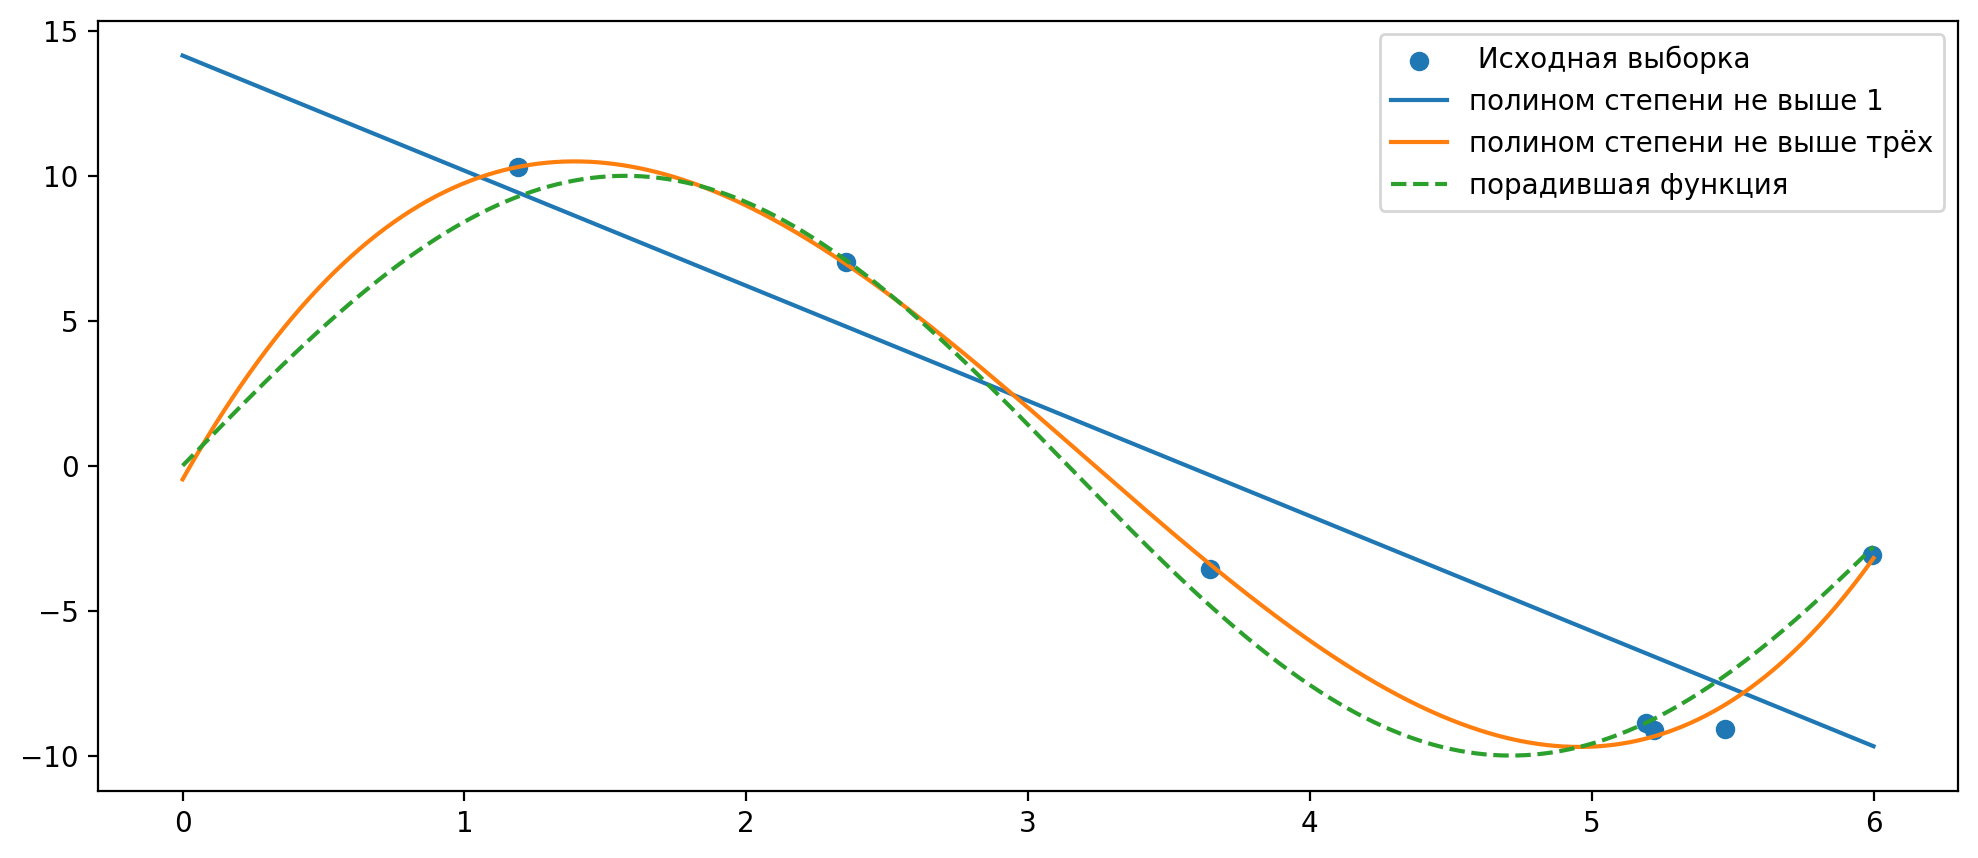

In [151]:
p1 = np.polyfit(x_sample, y_sample, deg = 1)
p3 = np.polyfit(x_sample, y_sample, deg = 4)

x_line = np.linspace(0, 6, 1000)
plt.figure(figsize = (12, 5), dpi = 200)
plt.scatter(x_sample, y_sample, label = ' Исходная выборка')
plt.plot(x_line, np.poly1d(p1)(x_line), label = 'полином степени не выше 1')
plt.plot(x_line, np.poly1d(p3)(x_line), label = 'полином степени не выше трёх')
plt.plot(x_line, 10 * np.sin(x_line), label = 'порадившая функция', linestyle ='--')
plt.legend()


## Задача 2. Регуляризация (3 балла).

Для стандартного набора данных для задачи регрессии (см. например load_diabetes из sklearn.datasets) продемонстрируйте, как веса обращаются в ноль по мере увеличения коэффициента $\mu$ $L_2$-регуляризации. Для поиска минимума используйте градиентный спуск.





In [152]:
fold = KFold(n_splits = 3, shuffle = True)

In [153]:
def get_mse(model, data, target):
    mse = []
    for train, test in fold.split(data):
        X_train, X_test = data[train], data[test]
        y_train, y_test = target[train], target[test]
        model.fit(X_train, y_train)
        mse.append(metrics.mean_squared_error(model.predict(X_test), y_test))
    
    return np.mean(mse), np.std(mse)

In [154]:
from sklearn.datasets import load_diabetes

data, target = load_diabetes(return_X_y=True)
mu_values = np.arange(0, 10, 0.01)
cff = []
mse = []
std = []
for mu in mu_values:
    model = linear_model.Ridge(fit_intercept = True, solver = 'sag', alpha = mu).fit(data, target)
    cff.append(model.coef_)
    res, s = get_mse(model, data, target)
    mse.append(res)
    std.append(s)

Text(0.5, 0, 'Параметр регуляризации')

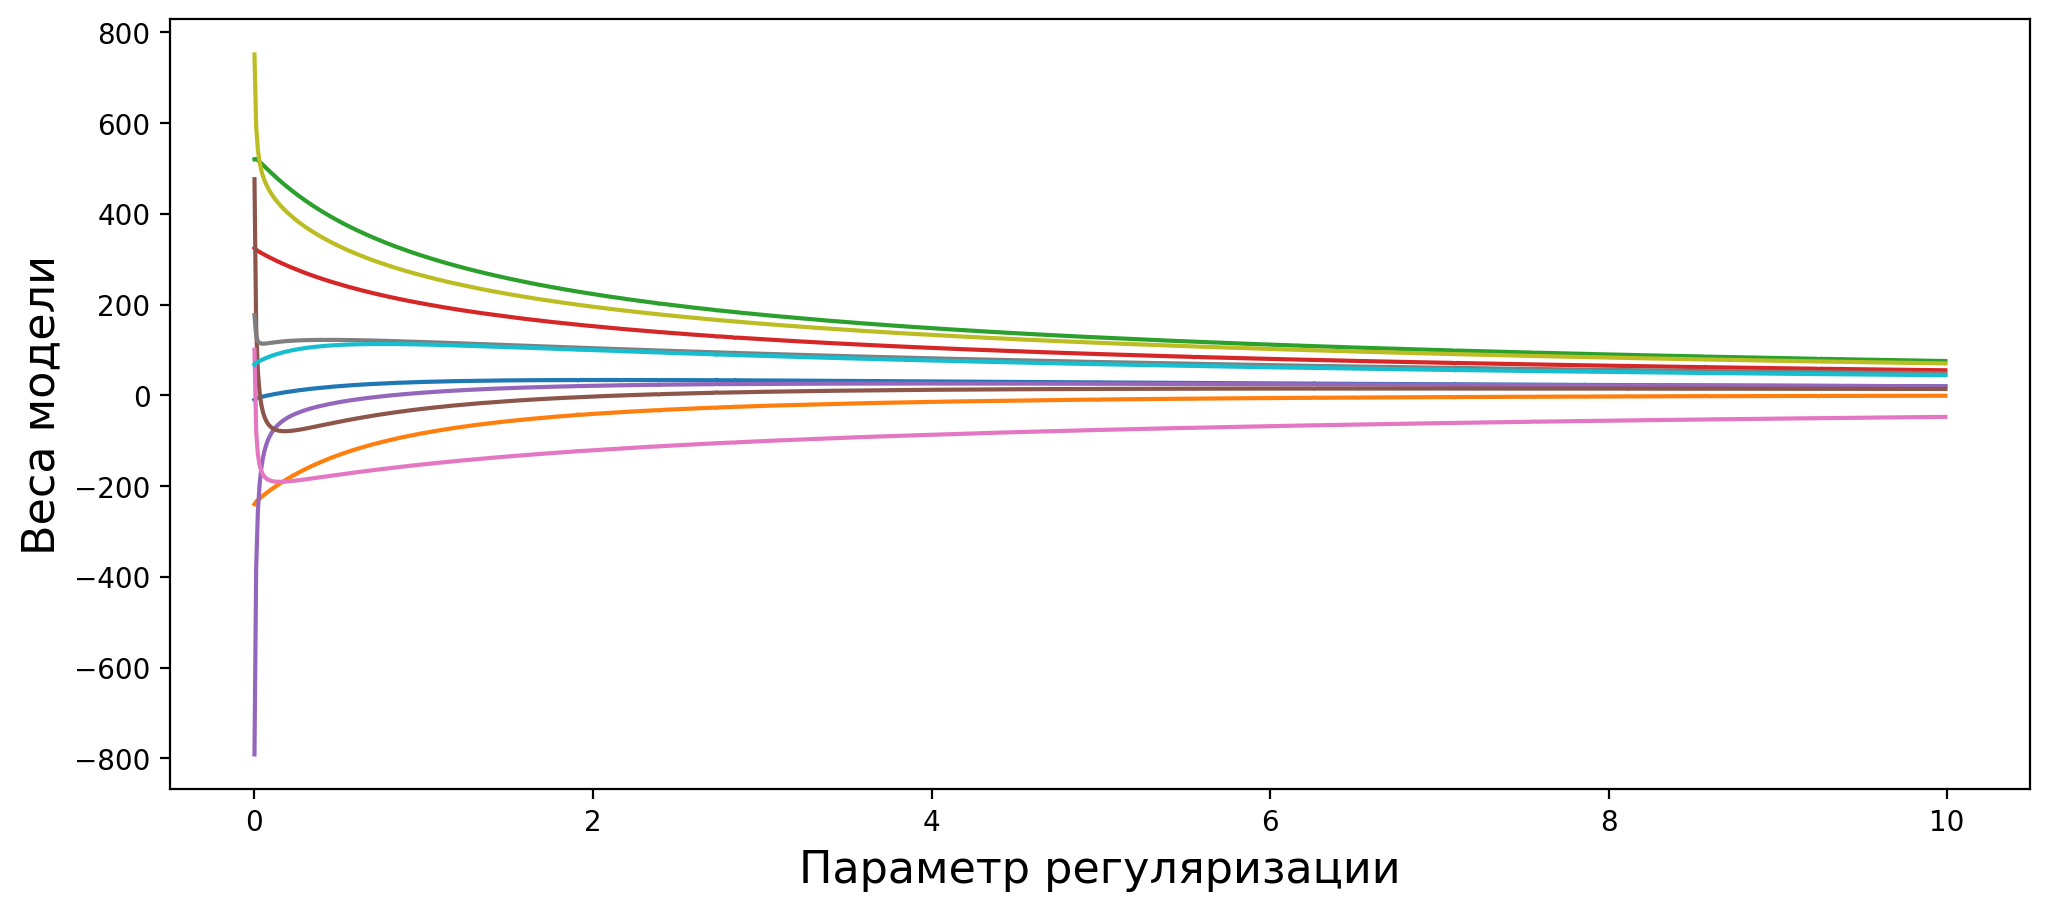

In [155]:
plt.figure(figsize = (12, 5), dpi = 200)
plt.plot(mu_values, cff);
plt.ylabel("Веса модели", fontsize = 16)
plt.xlabel("Параметр регуляризации", fontsize = 16)

(0.0, 1.0)

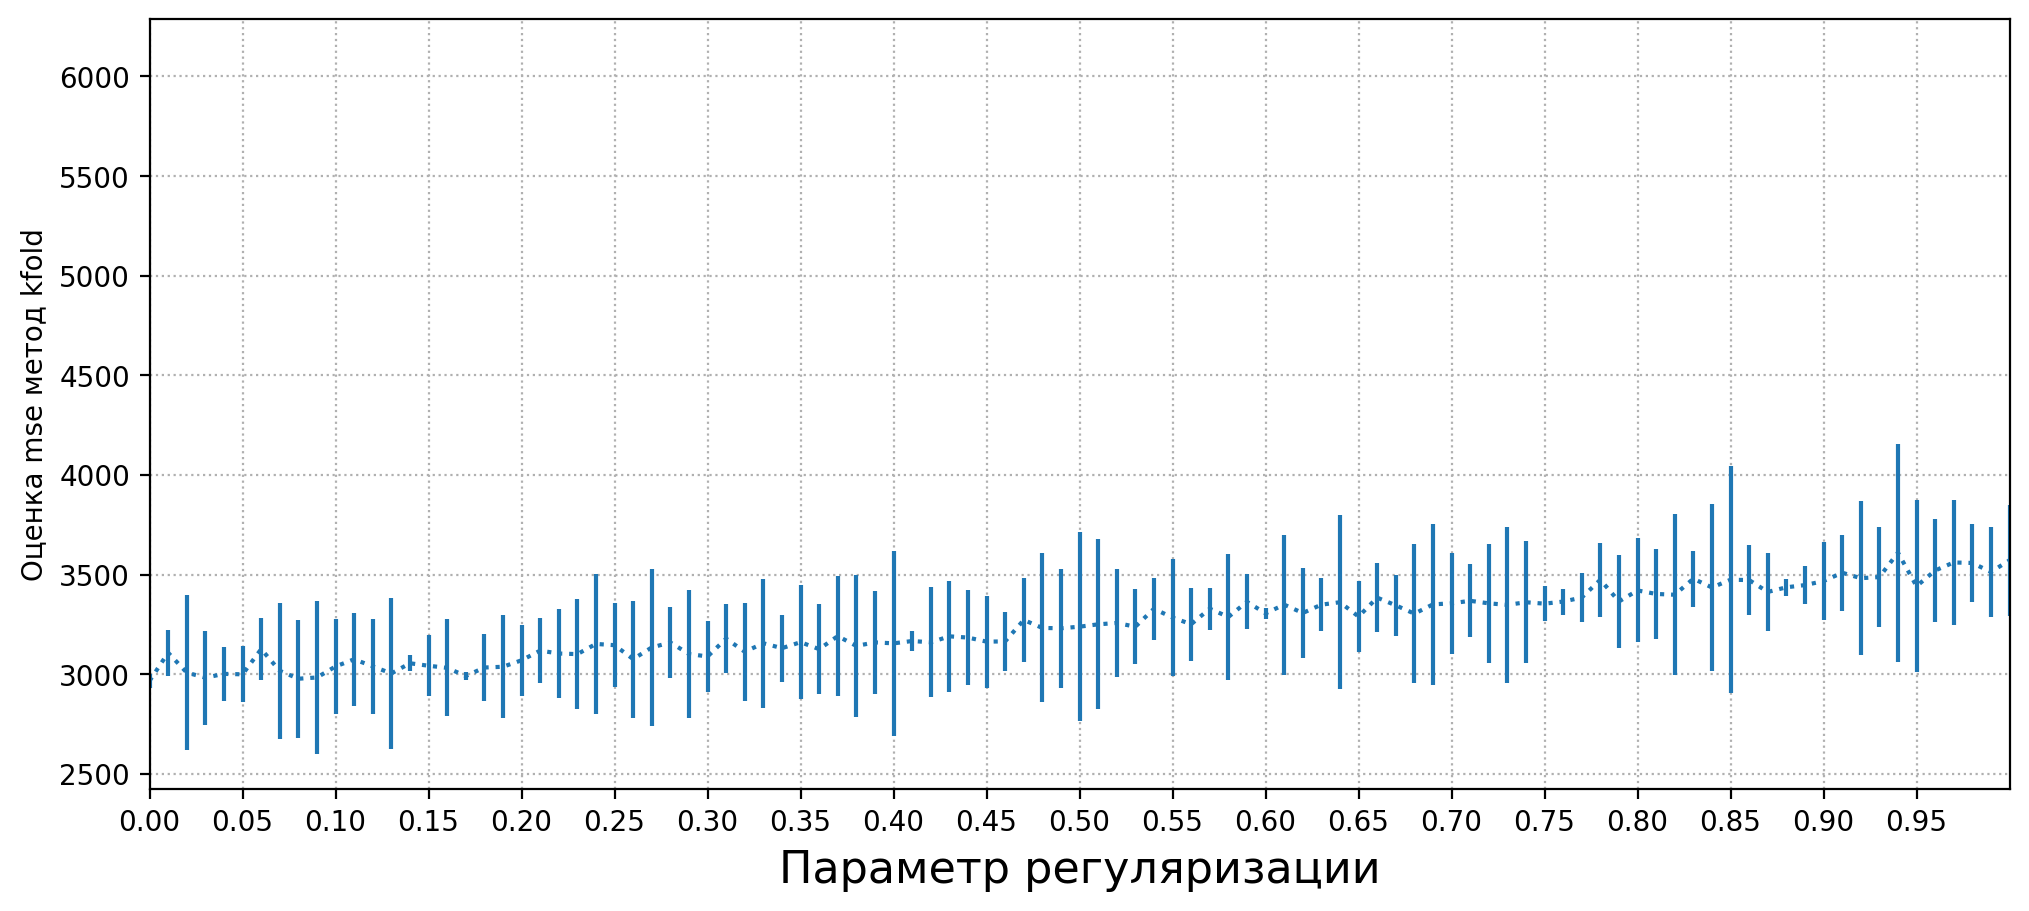

In [156]:
plt.figure(figsize = (12, 5), dpi = 200)
# plt.ylim(2800, 3200)
plt.errorbar(mu_values, mse, yerr = std, fmt = ':')
plt.grid(ls = ':')
plt.ylabel("Оценка mse метод kfold", fontsize = 10)
plt.xlabel("Параметр регуляризации", fontsize = 16)
plt.xticks(np.arange(0, 1, 0.05));
plt.xlim(0, 1)

Таким образом лучший параметр находится в диапазоне от 0.2 до 0.25

C помощью K-Fold кроссвалидаций $(K=3)$ осуществите для этого метода подбор параметров: коэффициент перед регуляризатором и параметр градиентного спуска (learning rate).

Оценивание задания:

1 балл - за демонстрацию обращения коэффициентов в нуль

1 балл - за подбор коэффициента перед регуляризатором

1 балл - за подбор параметра градиентного спуска

## Задача 3. Приложения SVD (3 балла).

Частица единичной массы в начальный момент времени покоится в точке $x=0$. Затем она подвергается воздействию кусочно-постоянной внешней силы $f_i(i=1 \ldots 10)$. Пусть $a=\left.(x, v)\right|_{t=10}-$ вектор, состоящий из координаты и скорости частицы в конечный момент времени.

Найдите матрицу $A$ такую, что $a=A f$. Заметьте, что она будет иметь размер $2 \times 10$. С помощью SVD-разложения численно найдите вектор $f$ наименьшей нормы, при котором $a=(1,0)$.


In [157]:
f = np.random.rand(10)
t = np.arange(10) + 1
a = [1, 0]
A = np.zeros(shape= (2, 10))
A[0] = f * np.power(t, 2) / 2
A[1] = f * t
print(A @ f)



[75.09659646 18.64313907]


## Задача 4. Кластеризация и классификация (4 балла).

Вам выдали классификатор $b(x)$, и вам предстоит разобраться, насколько он хорош. Для этого у вас есть тестовая выборка из 8 объектов. Ниже указаны правильные ответы и вероятности положительного класса от модели:

$$
\begin{array}{l|cccccccc}
b(x) & 0 & 0.2 & 0.3 & 0.4 & 0.5 & 0.7 & 0.9 & 0.95 \\
\hline y & -1 & -1 & +1 & +1 & -1 & +1 & +1 & +1
\end{array}
$$

Выполните следующие шаги:
1. Нарисуйте ROC-кривую и посчитайте AUC-ROC.
2. Посчитайте точность и полноту этой модели при пороге $t=0.55$.
3. Можно ли достичь полноты в хотя бы $70 \%$ при точности в хотя бы $60 \%$ ? Если да, укажите, при каком пороге.
4. Можно ли достичь полноты в $100 \%$ при точности в хотя бы $90 \%$ ? Если да, укажите, при каком пороге.

Указание.

Напомним, что такое точность и полнота.

В таблице содержится информация сколько раз система приняла верное и сколько раз неверное решение по документам заданного класса. А именно:
- $TP $- истино-положительное решение;
- $T N$ - истино-отрицательное решение;
- $FP $ - ложно-положительное решение;
- $F N$ - ложно-отрицательное решение.

Тогда, точность и полнота определяются следующим образом:
$$
\begin{gathered}
\text { Precision }=\frac{T P}{T P+F P} \\
\text { Recall }=\frac{T P}{T P+F N}
\end{gathered}
$$


ROC-кривая - это зависимость доли истинно положительных результатов (чувствительность теста) от доли ложноположительных результатов при варьировании порога.  AUC-ROC - площадь под графиком ROC-кривой.

In [158]:
bx = np.array([0, 0.2, 0.3, 0.4, 0.5, 0.7, 0.9, 0.95])
y = np.array([0, 0, 1, 1, 0, 1, 1, 1])

t_values = np.arange(0, 1, 0.01)
TP_values = []
FN_values = []
TN_values = []
accuracy = []
recall = []
precision = []
for t in t_values:
    prediction = (bx > t).astype(np.int64) 
    TP_mask = (y == 1) * (prediction == 1)
    TN_mask = (y == 0) * (prediction == 0)
    FP_mask = (y == 0) * (prediction == 1)
    FN_mask = (y == 1) * (prediction == 0)
    FN_values.append(np.sum(FN_mask))
    TN_values.append(np.sum(TN_mask))
    TP_values.append(np.sum(TP_mask))
    accuracy.append(np.sum(prediction == y) / len(y))
    recall.append(np.sum(TP_mask) / (np.sum(TP_mask) + np.sum(FN_mask)))
    precision.append(np.sum(TP_mask) / (np.sum(TP_mask) + np.sum(FP_mask)))

/tmp/ipykernel_84253/3257677954.py:22: RuntimeWarning: invalid value encountered in scalar divide
  precision.append(np.sum(TP_mask) / (np.sum(TP_mask) + np.sum(FP_mask)))


Text(0.5, 1.0, 'ROC - кривая')

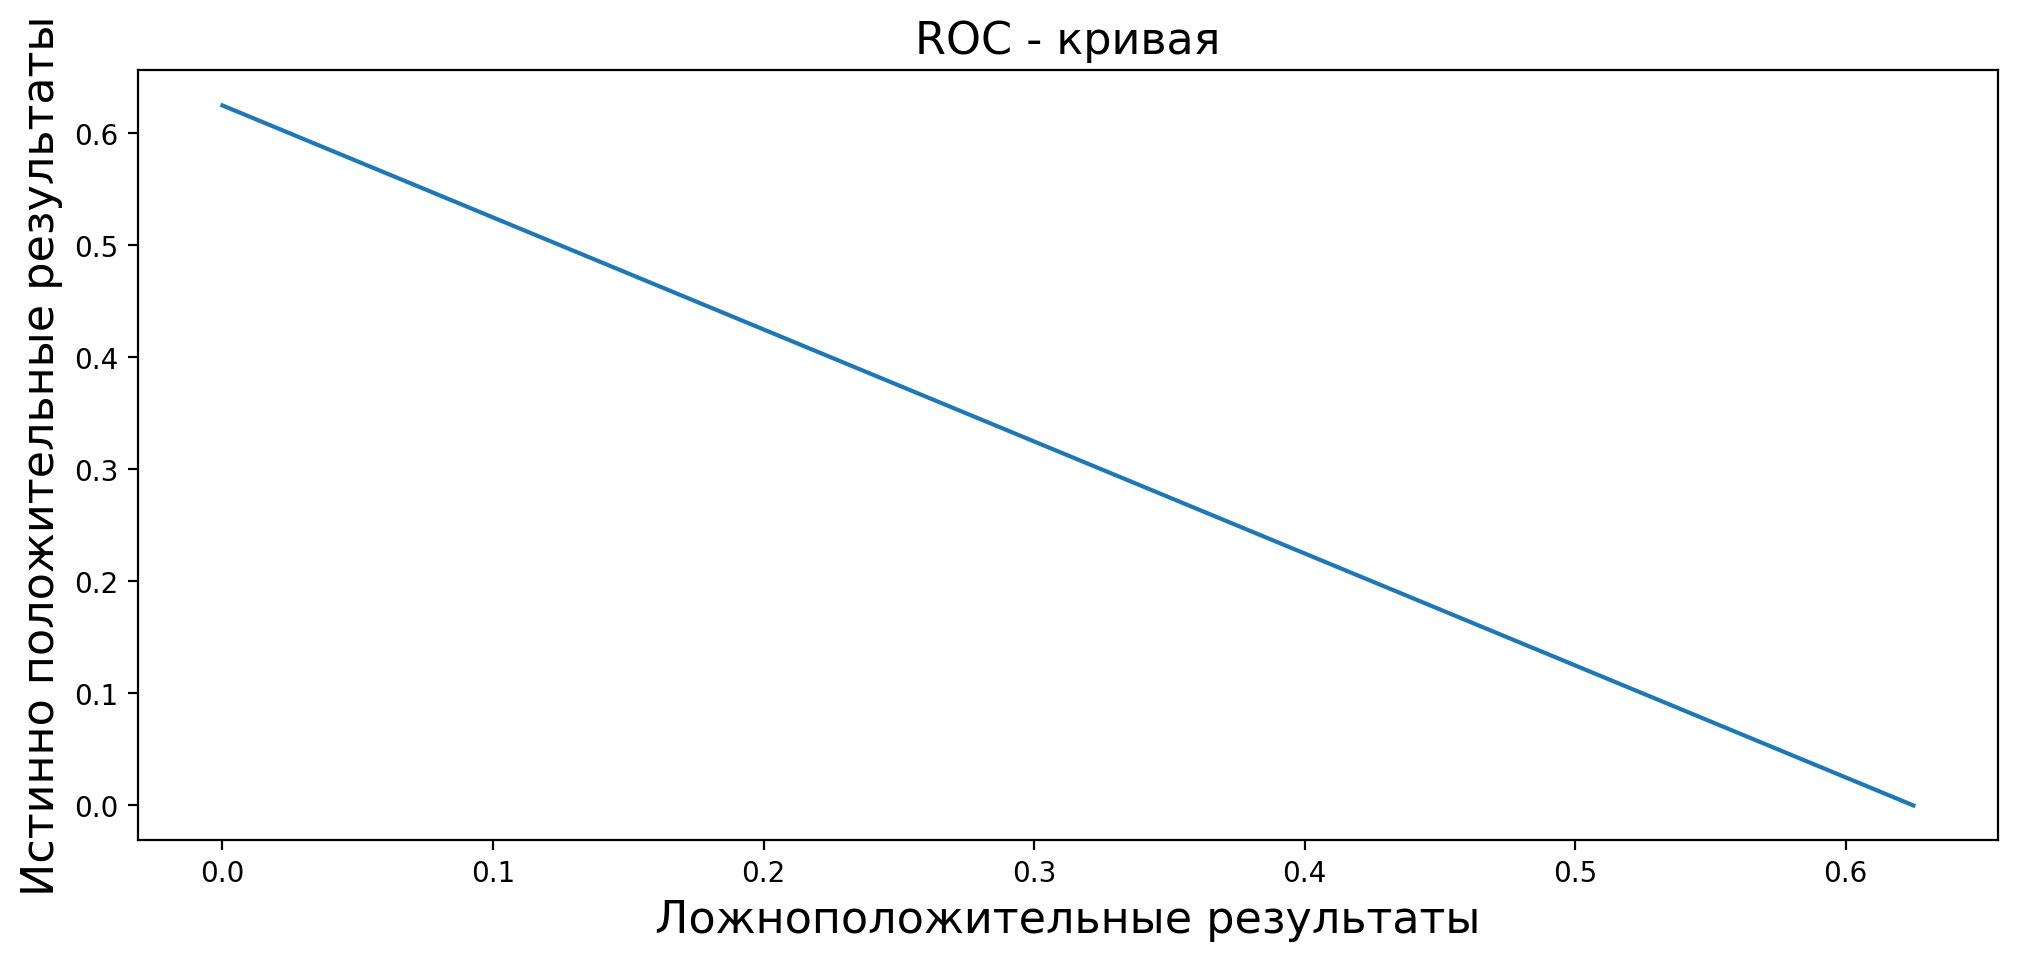

In [159]:
plt.figure(figsize = (12, 5), dpi = 200)
plt.plot(np.array(FN_values) / len(y), np.array(TP_values) / len(y))
plt.xlabel("Ложноположительные результаты", fontsize = 16)
plt.ylabel("Истинно положительные результаты", fontsize = 16)
plt.title("ROC - кривая", fontsize = 16)

In [160]:
AOC = np.trapz(x = np.array(FN_values) / len(y), y = np.array(TP_values) / len(y))
print(f"AOC: {AOC}")

AOC: 0.1953125


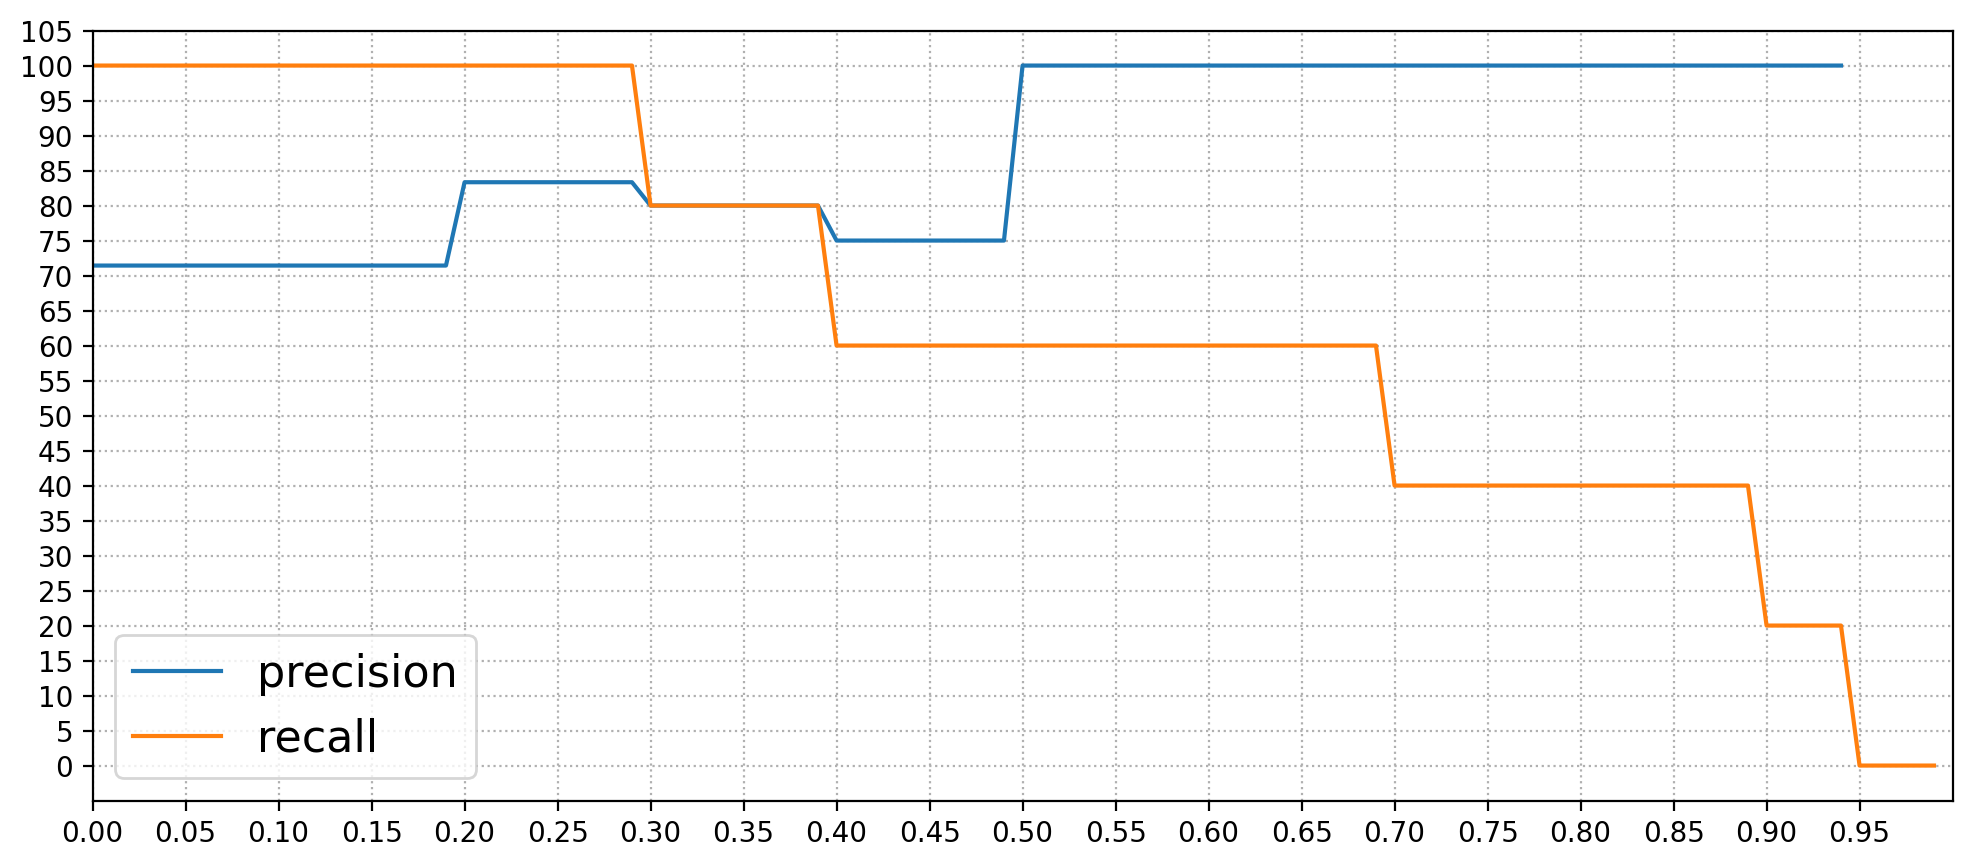

In [161]:
plt.figure(figsize = (12, 5), dpi = 200)
plt.plot(t_values, np.array(precision) * 100, label = 'precision')
plt.plot(t_values, np.array(recall) * 100, label = 'recall')
plt.legend(fontsize = 16)
plt.xlim(0, 1)
plt.xticks(np.arange(0, 1, 0.05))
plt.yticks(np.arange(0, 110, 5))
plt.grid(ls = ':')

__Отевет__

2. Точность и полнота модели при t = 0.55 равняется $100 \%$ и  $60 \%$ соответственно
3. Да, можно. При $t \in (0, 0.25)$ - смотрите график
4. Нельзя. Смотрите график